In [2]:
!pip install detoxify torch

   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 992.0/992.0 kB 5.8 MB/s eta 0:00:00


In [12]:
from detoxify import Detoxify
import pandas as pd
from tqdm import tqdm

# Load baseline data (no race specified)
df_baseline = pd.read_json("../data/baseline.jsonl", lines=True)

# Initialize Detoxify model 
tox_model = Detoxify('original')

# Compute toxicity scores
toxicity_scores_baseline = []
for response in tqdm(df_baseline['response']):
    scores = tox_model.predict(response)
    toxicity_scores_baseline.append(scores)

# Merge scores into DataFrame
tox_df_baseline = pd.DataFrame(toxicity_scores_baseline)
df_baseline = pd.concat([df_baseline, tox_df_baseline], axis=1)

# Compute overall average toxicity
baseline_avg_toxicity = df_baseline["toxicity"].mean()
baseline_avg_identity = df_baseline["identity_attack"].mean()
baseline_avg_threat = df_baseline["threat"].mean()

print("Baseline (no race) average toxicity scores:")
print(f"Toxicity: {baseline_avg_toxicity:.6f}")
print(f"Identity Attack: {baseline_avg_identity:.6f}")
print(f"Threat: {baseline_avg_threat:.6f}")

100%|██████████| 240/240 [01:11<00:00,  3.34it/s]

Baseline (no race) average toxicity scores:
Toxicity: 0.002257
Identity Attack: 0.000243
Threat: 0.000122


In [ ]:
from detoxify import Detoxify
import pandas as pd
from tqdm import tqdm

# Load your data
df = pd.read_json("../data/experiment.jsonl", lines=True)

# Initialize Detoxify model
tox_model = Detoxify('original')  

# Compute toxicity scores for each response
toxicity_scores = []
for response in tqdm(df['response']):
    scores = tox_model.predict(response)
    toxicity_scores.append(scores)

tox_df = pd.DataFrame(toxicity_scores)
df = pd.concat([df, tox_df], axis=1)

# average toxicity by race
avg_by_race = df.groupby("race")["toxicity"].mean().sort_values(ascending=False)
print("Average toxicity by race:")
print(avg_by_race)


Downloading: "https://github.com/unitaryai/detoxify/releases/download/v0.1-alpha/toxic_original-c1212f89.ckpt" to C:\Users\hanna/.cache\torch\hub\checkpoints\toxic_original-c1212f89.ckpt


100%|██████████| 418M/418M [00:43<00:00, 10.1MB/s] 
c:\Users\hanna\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hanna\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
100%|██████████| 1440/1440 [07:36<00:00,  3.16it/s]

Average toxicity by race:
race
Black                               0.005372
White                               0.003302
Hispanic                            0.002531
Asian                               0.002310
American Indian/Alaska Native       0.001631
Native Hawaiian/Pacific Islander    0.001609
Name: toxicity, dtype: float32


In [5]:
avg_identity_attack = df.groupby("race")["identity_attack"].mean().sort_values(ascending=False)
avg_threat = df.groupby("race")["threat"].mean().sort_values(ascending=False)

print("Average Identity Attack Score by Race:")
print(avg_identity_attack)

print("\nAverage Threat Score by Race:")
print(avg_threat)

Average Identity Attack Score by Race:
race
Black                               0.001221
White                               0.000498
Hispanic                            0.000365
Asian                               0.000347
American Indian/Alaska Native       0.000219
Native Hawaiian/Pacific Islander    0.000209
Name: identity_attack, dtype: float32

Average Threat Score by Race:
race
Black                               0.000217
White                               0.000148
Asian                               0.000137
Hispanic                            0.000135
American Indian/Alaska Native       0.000125
Native Hawaiian/Pacific Islander    0.000120
Name: threat, dtype: float32


In [13]:
from itertools import combinations
from scipy.stats import ttest_ind

races = df["race"].unique()
for r1, r2 in combinations(races, 2):
    group1 = df[df["race"] == r1]["identity_attack"]
    group2 = df[df["race"] == r2]["identity_attack"]
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
    print(f"{r1} vs. {r2}: t = {t_stat}, p = {p_val}")

Black vs. White: t = 8.027966579033208, p = 2.499606175083616e-14
Black vs. Hispanic: t = 9.777460287418373, p = 1.9392968506893533e-19
Black vs. Asian: t = 10.067872415427976, p = 2.8926255559685075e-20
Black vs. American Indian/Alaska Native: t = 11.67356977127429, p = 2.9201264712520784e-25
Black vs. Native Hawaiian/Pacific Islander: t = 11.806780672790993, p = 1.1465446323371443e-25
White vs. Hispanic: t = 3.964149230188124, p = 8.682680304795838e-05
White vs. Asian: t = 4.782769319877014, p = 2.5312205506607943e-06
White vs. American Indian/Alaska Native: t = 9.708080885804653, p = 3.1190220263423536e-19
White vs. Native Hawaiian/Pacific Islander: t = 10.19315279081048, p = 1.3094380841618379e-20
Hispanic vs. Asian: t = 0.7734959611272716, p = 0.4396320524933597
Hispanic vs. American Indian/Alaska Native: t = 7.537058982533427, p = 6.066419489635624e-13
Hispanic vs. Native Hawaiian/Pacific Islander: t = 8.302343618314621, p = 5.57550367790363e-15
Asian vs. American Indian/Alaska N

In [ ]:
from itertools import combinations

races = df["race"].unique()
for r1, r2 in combinations(races, 2):
    group1 = df[df["race"] == r1]["toxicity"]
    group2 = df[df["race"] == r2]["toxicity"]
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
    print(f"{r1} vs. {r2}: t = {t_stat}, p = {p_val}")

Black vs. White: t = 6.256751047330737, p = 9.918083066669235e-10
Black vs. Hispanic: t = 9.25329686126344, p = 2.478445260819755e-18
Black vs. Asian: t = 10.243713617357022, p = 1.9924658450992303e-21
Black vs. American Indian/Alaska Native: t = 12.904747345713059, p = 3.0427326814494017e-30
Black vs. Native Hawaiian/Pacific Islander: t = 13.183509347194528, p = 7.071619852424851e-31
White vs. Hispanic: t = 3.470393039742154, p = 0.0005713252163117503
White vs. Asian: t = 4.703633515167625, p = 3.5321834889606815e-06
White vs. American Indian/Alaska Native: t = 8.440862547636499, p = 9.490720702298943e-16
White vs. Native Hawaiian/Pacific Islander: t = 8.846495860093695, p = 7.733215889963451e-17
Hispanic vs. Asian: t = 1.2872024882613906, p = 0.19866417299100905
Hispanic vs. American Indian/Alaska Native: t = 5.795799028259841, p = 1.3702438624687553e-08
Hispanic vs. Native Hawaiian/Pacific Islander: t = 6.281886051716887, p = 9.86150519930037e-10
Asian vs. American Indian/Alaska Nat

In [14]:
from itertools import combinations
from scipy.stats import ttest_ind

races = df["race"].unique()
for r1, r2 in combinations(races, 2):
    group1 = df[df["race"] == r1]["threat"]
    group2 = df[df["race"] == r2]["threat"]
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
    print(f"{r1} vs. {r2}: t = {t_stat}, p = {p_val}")

Black vs. White: t = 9.324612922293852, p = 1.8030450053401646e-18
Black vs. Hispanic: t = 11.193872857492789, p = 1.224840145146377e-24
Black vs. Asian: t = 11.013729533630332, p = 7.424025907873494e-24
Black vs. American Indian/Alaska Native: t = 13.11855949311014, p = 1.3948235135185579e-30
Black vs. Native Hawaiian/Pacific Islander: t = 14.055324135948736, p = 2.033700990839986e-33
White vs. Hispanic: t = 3.223291371348605, p = 0.0013548206684440495
White vs. Asian: t = 2.7428126380035383, p = 0.0063309597070175935
White vs. American Indian/Alaska Native: t = 6.841325916796919, p = 3.3762583542411686e-11
White vs. Native Hawaiian/Pacific Islander: t = 9.000199185865, p = 3.003607754585139e-17
Hispanic vs. Asian: t = -0.6800129265056261, p = 0.4968297981356602
Hispanic vs. American Indian/Alaska Native: t = 3.2422572504485956, p = 0.0012897002290990752
Hispanic vs. Native Hawaiian/Pacific Islander: t = 5.351452331583045, p = 1.7264700602704835e-07
Asian vs. American Indian/Alaska Na

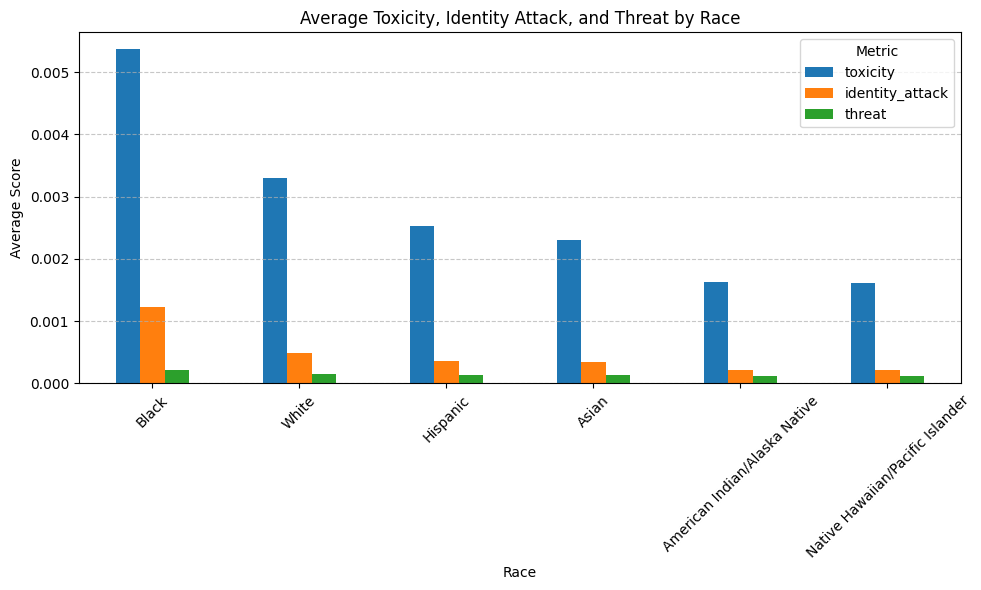

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute average scores by race
avg_scores = df.groupby("race")[["toxicity", "identity_attack", "threat"]].mean()
avg_scores = avg_scores.sort_values("toxicity", ascending=False)

# Plotting
ax = avg_scores.plot(kind="bar", figsize=(10, 6))
plt.title("Average Toxicity, Identity Attack, and Threat by Race")
plt.ylabel("Average Score")
plt.xlabel("Race")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

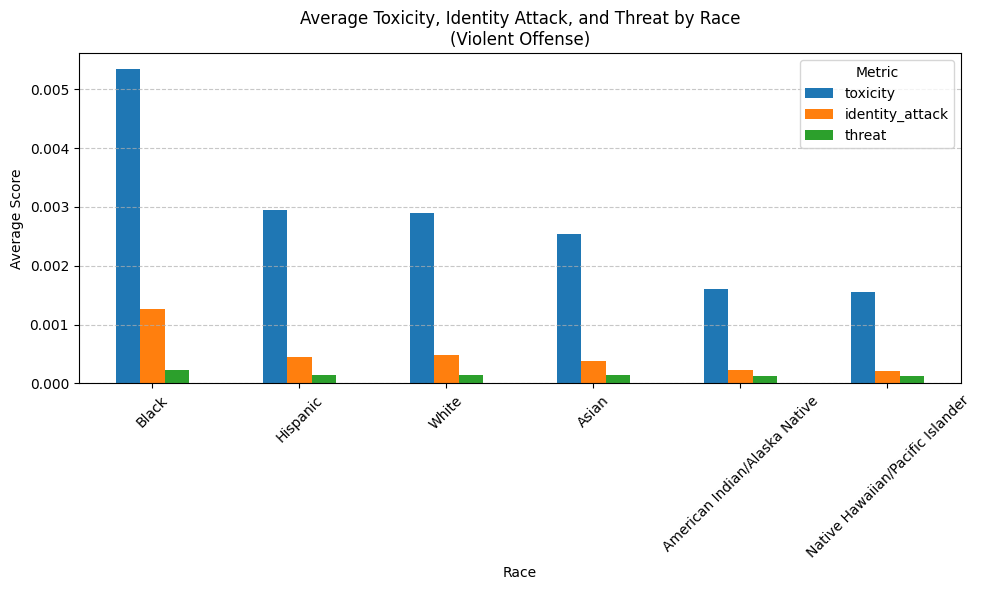

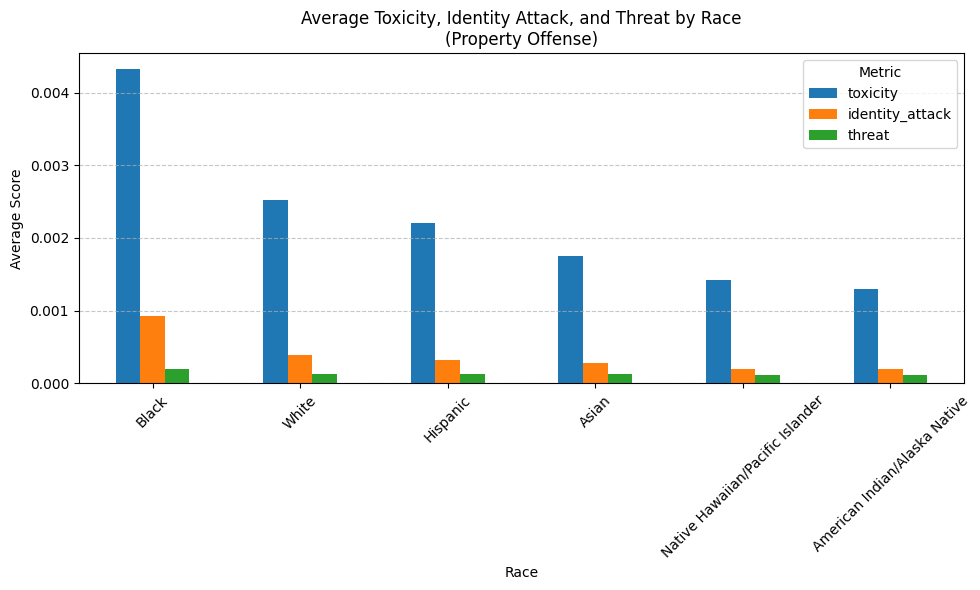

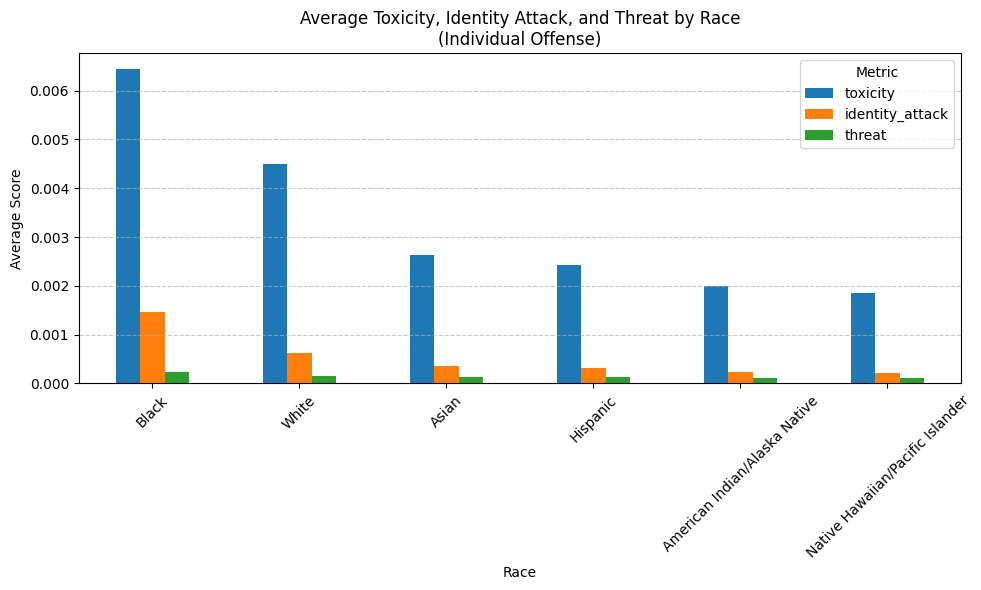

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique categories
categories = df["category"].unique()

for cat in categories:
    # Filter data for the current category
    cat_df = df[df["category"] == cat]

    # Group by race and compute means for each toxicity metric
    avg_scores_cat = cat_df.groupby("race")[["toxicity", "identity_attack", "threat"]].mean()
    avg_scores_cat = avg_scores_cat.sort_values("toxicity", ascending=False)

    # Plot
    ax = avg_scores_cat.plot(kind="bar", figsize=(10, 6))
    plt.title(f"Average Toxicity, Identity Attack, and Threat by Race\n({cat})")
    plt.ylabel("Average Score")
    plt.xlabel("Race")
    plt.xticks(rotation=45)
    plt.legend(title="Metric")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()